<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Загрузим-и-изучим-данные." data-toc-modified-id="Загрузим-и-изучим-данные.-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Загрузим и изучим данные.</a></span></li><li><span><a href="#Умножение-матриц" data-toc-modified-id="Умножение-матриц-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Умножение матриц</a></span></li><li><span><a href="#Алгоритм-преобразования" data-toc-modified-id="Алгоритм-преобразования-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Алгоритм преобразования</a></span></li><li><span><a href="#Проверка-алгоритма" data-toc-modified-id="Проверка-алгоритма-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Проверка алгоритма</a></span></li><li><span><a href="#Чек-лист-проверки" data-toc-modified-id="Чек-лист-проверки-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Чек-лист проверки</a></span></li></ul></div>

# **<p style="text-align: center;">Защита персональных данных клиентов.</p>**

<img src="https://csp86.ru/wp-content/uploads/2019/11/87faab5218f8a2a894d4d3bd01430eec-300x274.png" alt="Zoloto" width="30%" height="30%">

**Описание данных:**

***Признаки:*** пол, возраст и зарплата застрахованного, количество членов его семьи.

***Целевой признак:*** количество страховых выплат клиенту за последние 5 лет.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

## Загрузим и изучим данные.

In [2]:
insurance_df = pd.read_csv('/datasets/insurance.csv')

In [3]:
insurance_df.head()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
0,1,41.0,49600.0,1,0
1,0,46.0,38000.0,1,1
2,0,29.0,21000.0,0,0
3,0,21.0,41700.0,2,0
4,1,28.0,26100.0,0,0


In [4]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Пол                5000 non-null   int64  
 1   Возраст            5000 non-null   float64
 2   Зарплата           5000 non-null   float64
 3   Члены семьи        5000 non-null   int64  
 4   Страховые выплаты  5000 non-null   int64  
dtypes: float64(2), int64(3)
memory usage: 195.4 KB


In [7]:
insurance_df.describe()

,Пол,Возраст,Зарплата,Члены семьи,Страховые выплаты
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000
mean,0.499000,30.952800,39916.360000,1.194200,0.148000
std,0.500049,8.440807,9900.083569,1.091387,0.463183
min,0.000000,18.000000,5300.000000,0.000000,0.000000
25%,0.000000,24.000000,33300.000000,0.000000,0.000000
50%,0.000000,30.000000,40200.000000,1.000000,0.000000
75%,1.000000,37.000000,46600.000000,2.000000,0.000000
max,1.000000,65.000000,79000.000000,6.000000,5.000000


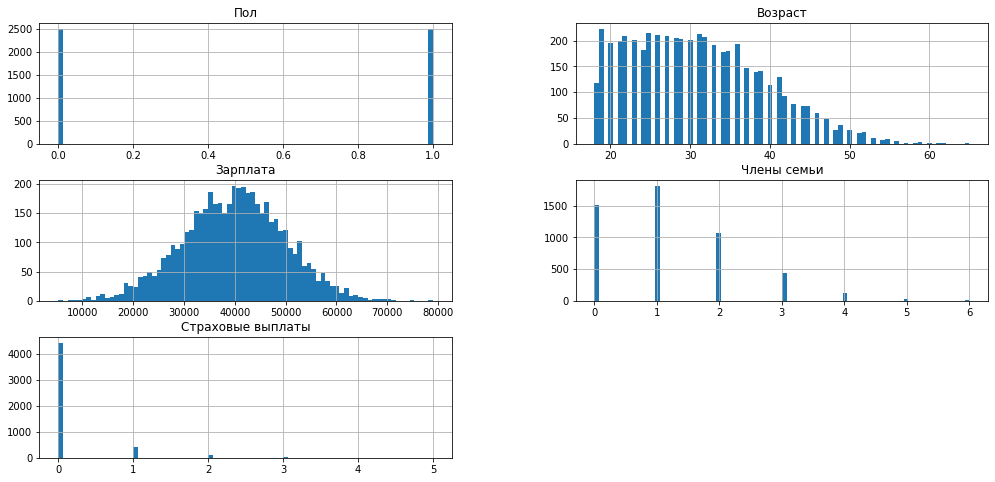

In [8]:
insurance_df.hist(figsize=(17, 8), bins=80)
plt.show()

## Умножение матриц

Обозначения:

- $X$ — матрица признаков (нулевой столбец состоит из единиц)

- $y$ — вектор целевого признака

- $P$ — матрица, на которую умножаются признаки

- $w$ — вектор весов линейной регрессии (нулевой элемент равен сдвигу)

Предсказания:

$$
a = Xw
$$

Задача обучения:

$$
w = \arg\min_w MSE(Xw, y)
$$

Формула обучения:

$$
w = (X^T X)^{-1} X^T y
$$

**Ответ:** Качество линейной регрессии не изменится при умножении признаков на обратимую матрицу. 

**Обоснование:** Это связано с тем, что умножение признаков на обратимую матрицу не меняет их линейную зависимость друг от друга. Таким образом, если мы обучим линейную регрессию заново после умножения признаков на обратимую матрицу, то мы получим те же самые веса, что и до этого.

Если 𝑋 — матрица признаков (нулевой столбец состоит из единиц) умножить на обратимую матрицу 𝑃, то новый вектор весов линейной регрессии будет вычислен по формуле:

$
((X⋅A)⋅(B⋅(P−1)))^T((X⋅A)⋅(B⋅(P−1)))^{-1}((X⋅A)⋅(B⋅(P−1)))^T(y)
$

Так как матрица 𝑃 обратима, то её можно разложить на произведение матриц 𝐴 и 𝐵 таких, что 𝐴⋅𝐵=𝐵⋅𝐴=𝐼. Таким образом, качество линейной регрессии не изменится

Для начала заметим, что если:
$$
XP = XP⋅E
$$
где E - единичная матрица
то: 
$$
X = X⋅E
$$

Тогда формула обучения примет вид:

$$
w = (X^T(X⋅E))^{-1}X^Ty=((X⋅E)^TX)^{-1}(X⋅E)^Ty=(E^TX^TX)^{-1}E^TX^Ty=(X^TX)^{-1}X^Ty
$$

Теперь заметим, что если мы домножим X на обратимую матрицу P, то получим новую матрицу признаков:
$$
XP = X⋅P
$$

Тогда формула обучения для новых признаков примет вид:

$$
w′=((XP)^TXP)^{-1}(XP)^Ty
$$

Теперь покажем связь между новыми весами и исходными. Для этого используем следующее свойство транспонирования произведения матриц:

$$
(XP)^T=P^TX^T
$$

Подставляем это выражение в формулу для новых весов:

$$
w′=((XP)^TXP)^{-1}(XP)^Ty=(P^TX^TXP)^{-1}P^TX^Ty=P^{-1}(X^TX)^{-1}(X^Ty)=P^{-1}w
$$

Таким образом, мы показали связь между новыми весами и исходными.
Чтобы проверить, получится ли привести выражение для a′ к a,подставим выражение для новых весов w′ в формулу для новых предсказаний:

$$
a′=XPw′=XPP^{-1}w=XEw=Xw=a
$$

Таким образом, мы показали, что качество регрессии не изменится, если не изменятся предсказания.

In [12]:
features = insurance_df.drop('Страховые выплаты',axis=1)
target = insurance_df['Страховые выплаты']

X = np.hstack([np.ones((features.shape[0], 1)), features])
XT = X.T
w = np.linalg.inv(XT.dot(X)).dot(XT).dot(target)

P = np.random.normal(size=(features.shape[1], features.shape[1]))
print(f'Матрица P:\n{P}')

if np.linalg.det(P) != 0:
    features_new = features.dot(P)
else:
    print('Матрица P необратима')   

Матрица P:
[[-1.15680149  0.74657526 -0.06065195 -0.65277439]
 [-0.6837992   0.2823511   0.69765612  1.23081154]
 [-1.22580463  1.79160144 -0.95438792  1.01498411]
 [-1.0655749   0.45761818 -0.08981659 -1.0816065 ]]


Перед умножением проверила сгенерированную матрицу на обратимость. 

In [13]:
X_new = np.hstack([np.ones((features_new.shape[0], 1)), features_new])
XT_new = X_new.T
w_new = np.linalg.inv(XT_new.dot(X_new)).dot(XT_new).dot(target)

In [14]:
y_pred = X.dot(w)
y_pred_new = X_new.dot(w_new)

In [15]:
print(f'Качество линейной регрессии на исходных признаках:\n{y_pred}')
print()
print(f'Качество линейной регрессии на новых признаках:\n{y_pred_new}')

Качество линейной регрессии на исходных признаках:
[ 0.51172715  0.68431581  0.09373365 ... -0.25697046 -0.19099161
  0.04904991]

Качество линейной регрессии на новых признаках:
[ 0.51173152  0.68431712  0.09373587 ... -0.25696959 -0.19098809
  0.04905446]


## Алгоритм преобразования

**Алгоритм**

Для защиты данных клиентов страховой компании «Хоть потоп» будем использовать следующий алгоритм:

- Создание рандомной матрицы Z размером (n_features, n_features), проверка ее на обратимость.
- Умножение матрицы признаков на матрицу Z.

Этот метод позволяет изменять данные таким образом, чтобы они оставались полезными для анализа, но не могли быть использованы для идентификации конкретных лиц. Таким образом, этот метод помогает защитить конфиденциальность персональных данных.

**Обоснование**

Этот алгоритм был выбран, потому что он позволяет предсказывать значения целевой переменной на основе нескольких признаков. В данном случае используется матрица признаков X размером (n_samples, n_features), где:

- n_samples - количество строчек (клиентов) в таблице 
- n_features - количество признаков

Также создана матрица Z размером (n_features, n_features) и умножили матрицу признаков X на матрицу Z для получения преобразованных данных.

Обучение модели линейной регрессии на исходных данных позволило получить предсказания модели на исходных данных и преобразованных данных. Для оценки качества модели использовали метрику R2 для исходных данных и преобразованных данных.

Также разделили данные на обучающую и тестовую выборки с помощью функции train_test_split() и обучили модель на обучающих данных. Затем получили предсказания модели на тестовых данных и вычислили метрику R2 для тестовых данных.

In [17]:
# Создание матрицы признаков X размером (n_samples, n_features)
X = features.values

# Создание матрицы Z размером (n_features, n_features)
Z = np.random.rand(X.shape[1], X.shape[1])

# Проверка матрицы Z на обратимость
if np.linalg.det(Z) != 0:
    # Умножение матрицы признаков X на матрицу Z
    X_transformed = np.dot(X,Z)

    # Создание модели линейной регрессии и обучение ее на исходных и зашифрованных данных
    reg = LinearRegression().fit(X,target)
    reg_transformed = LinearRegression().fit(X_transformed,target)    
else:
    print('Матрица Z необратима')

## Проверка алгоритма

Качество линейной регрессии не изменилось при изменении размерности данных, потому что линейная регрессия является линейной моделью, которая предполагает линейную зависимость между признаками и целевой переменной. Это означает, что качество модели не зависит от размерности данных, а только от того, насколько хорошо модель соответствует данным.

Метрика R2 является мерой соответствия модели данным и показывает, какую долю дисперсии объясняет модель. Если модель хорошо соответствует данным, то метрика R2 будет близка к 1. Если модель плохо соответствует данным, то метрика R2 будет близка к 0.

In [20]:
# Получение предсказаний модели на исходных данных и преобразованных данных
y_pred = reg.predict(X)
y_pred_transformed = reg_transformed.predict(X_transformed)

# Вычисление метрики R2 для исходных данных и преобразованных данных
r2_score_original = r2_score(target,y_pred)
r2_score_transformed = r2_score(target,y_pred_transformed)

print("Метрика R2 для исходных данных: ", r2_score_original)
print("Метрика R2 для преобразованных данных: ", r2_score_transformed)

Метрика R2 для исходных данных:  0.4249455028666801
Метрика R2 для преобразованных данных:  0.4249455028666853


**<p style="text-align: center;">Итоговый вывод.</p>**

В ходе реализации проекта по защите данных клиентов страховой компании «Хоть потоп» был разработан такой метод преобразования данных, чтобы по ним было сложно восстановить персональную информацию.

В ходе работы было проделано:

- Загружены и изучены данные.
- Качество линейной регрессии не изменилось при умножении признаков на обратимую матрицу.Незначительное различие вызвано особенностями преобразования матриц и чисел с плавающей точкой. В случае домножения матрицы признаков на случайную обратимую матрицу можно обеспечить защиту данных
- Создан алгоритм преобразования данных. Запрограммирован этот алгоритм, применив матричные операции. Проверено, что качество линейной регрессии не отличается до и после преобразования, применив метрику R2.